<a href="https://colab.research.google.com/github/angelostefanini/data_analytics/blob/main/Customer_churn_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Bank Customer Churn Prediction Model***

# ***Introduction***

Our study objectives are as follows:

- Identify and visually represent the factors influencing customer churn.

- Develop a prediction model with the following capabilities:

  a. Classify whether a customer is likely to churn or not.

  b. Ideally, select a model based on its performance that assigns a probability to churn. This will facilitate customer service efforts to focus on easily addressable issues and prevent churn.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
df_original = pd.read_csv("/content/Churn_Modelling.csv")
df_original.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
# number_of_rows, number_of_columns

df_original.shape


(10000, 14)

In [3]:
# This output provides a quick overview of the DataFrame's structure, data types, and the presence of missing values
df_original.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


There are no missing values

# ***Feature engineering and class balancing***

Bank Customer Churn Prediction

I am going to remove from the dataset the columns I don't need as the information is useless or redundant.

In [4]:
# Drop the columns as explained above

churn_df = df_original.drop(["RowNumber", "CustomerId", "Surname", "Gender"], axis=1)
churn_df.head()


,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1
3,699,France,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Counting the number of zero and ones

counts = churn_df["Exited"].value_counts()


print(counts)

0    7963
1    2037
Name: Exited, dtype: int64


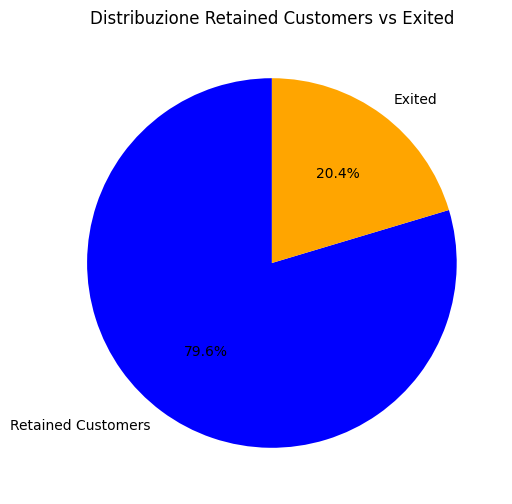

In [6]:
import matplotlib.pyplot as plt


# I am going to create a pie chart with column Exited and labels Exited vs. Retained customers
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=["Retained Customers", "Exited"], autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'])
plt.title("Distribuzione Retained Customers vs Exited")
plt.show()


<Axes: xlabel='IsActiveMember', ylabel='count'>

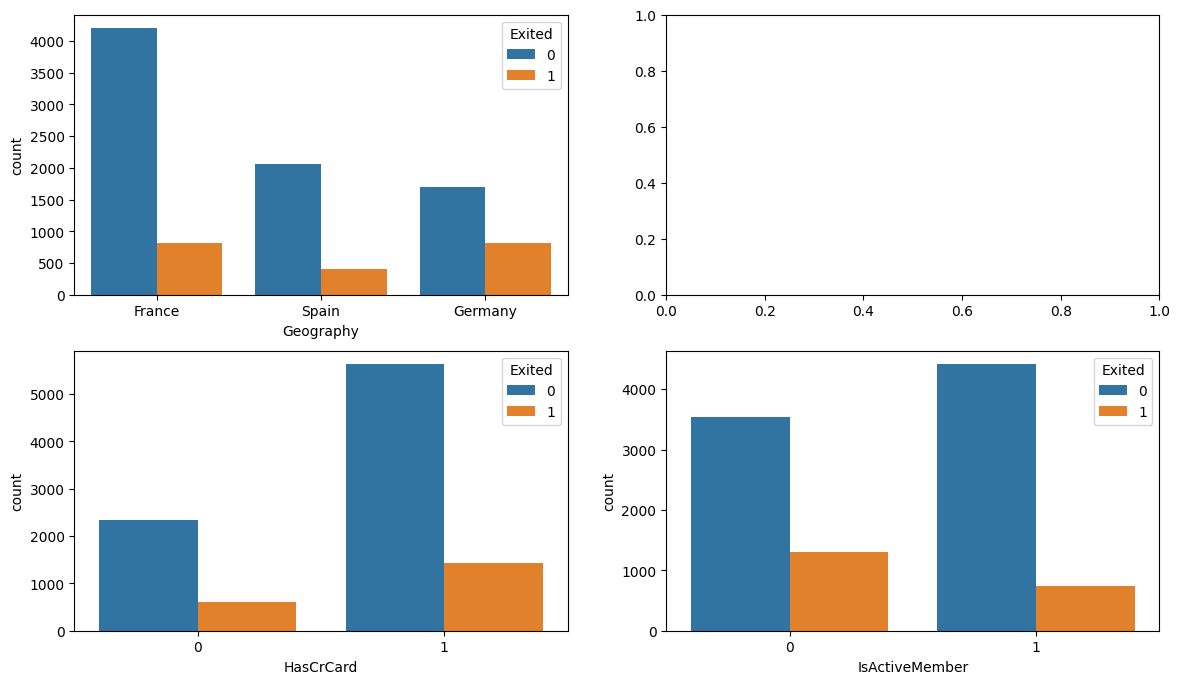

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, axarr = plt.subplots(2, 2, figsize=(14, 8))
sns.countplot(x='Geography', hue = 'Exited',data = churn_df, ax=axarr[0][0])
sns.countplot(x='HasCrCard', hue = 'Exited',data = churn_df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = churn_df, ax=axarr[1][1])


The data highlights that, although the majority of customers are French, the highest number of customers who left the bank comes from the German market, which is significantly smaller. Further investigation is needed to understand the potential causes of this phenomenon. Interestingly, there is a notably high number of users who left the service among cardholders, while among active members, the number of those who left the service appears to be lower.

In [8]:
# Create new column called loyalty

churn_df['loyalty'] = churn_df['Tenure'] / churn_df['Age']

print(churn_df.head())


   CreditScore Geography  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619    France   42       2       0.00              1          1   
1          608     Spain   41       1   83807.86              1          0   
2          502    France   42       8  159660.80              3          1   
3          699    France   39       1       0.00              2          0   
4          850     Spain   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited   loyalty  
0               1        101348.88       1  0.047619  
1               1        112542.58       0  0.024390  
2               0        113931.57       1  0.190476  
3               0         93826.63       0  0.025641  
4               1         79084.10       0  0.046512  


In [9]:
# I am going to print the unique Category of geo column

unique_geographies = churn_df['Geography'].unique()


In [10]:
# Create a new dataframe with dummy columns for categorical variables
churn_df_encoded = pd.get_dummies(churn_df, columns=['Geography'], prefix='Geography', drop_first=True)


print(churn_df_encoded.head())

   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited   loyalty  Geography_Germany  \
0               1        101348.88       1  0.047619                  0   
1               1        112542.58       0  0.024390                  0   
2               0        113931.57       1  0.190476                  0   
3               0         93826.63       0  0.025641                  0   
4               1         79084.10       0  0.046512                  0   

   Geography_Spain  
0                0  
1                1  
2                0  
3                0  
4                1  


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [12]:
# Drop the columns Tenure and Age as redundand and correlated to Loyalty

churn_df2 = churn_df_encoded.drop(["Tenure", "Age"], axis=1)
churn_df2.head()

,CreditScore,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,loyalty,Geography_Germany,Geography_Spain
0,619,0.00,1,1,1,101348.88,1,0.047619,0,0
1,608,83807.86,1,0,1,112542.58,0,0.024390,0,1
2,502,159660.80,3,1,0,113931.57,1,0.190476,0,0
3,699,0.00,2,0,0,93826.63,0,0.025641,0,0
4,850,125510.82,1,1,1,79084.10,0,0.046512,0,1


In [13]:
# Define the Y target
y = churn_df2["Exited"]

# Create the feature matrix X
X = churn_df2.drop("Exited", axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

# Create an instance of GaussianNB
gnb = GaussianNB()

# Fit the model on the training data
gnb.fit(X_train, y_train)

# Make predictions on the testing data
y_preds = gnb.predict(X_test)


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming we already have y_test and y_preds from our model

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_preds)
print(f"Accuracy: {accuracy:.4f}")

# Calculate and print precision
precision = precision_score(y_test, y_preds)
print(f"Precision: {precision:.4f}")

# Calculate and print recall
recall = recall_score(y_test, y_preds)
print(f"Recall: {recall:.4f}")

# Calculate and print F1 score
f1 = f1_score(y_test, y_preds)
print(f"F1 Score: {f1:.4f}")




Accuracy: 0.7964
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
np.unique(y_preds)

array([0])

In [15]:
X.describe()

,CreditScore,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,loyalty,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.137936,0.250900,0.247700
std,96.653299,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.089506,0.433553,0.431698
min,350.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.064516,0.000000,0.000000
50%,652.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.129032,0.000000,0.000000
75%,718.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.200000,1.000000,0.000000
max,850.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,0.555556,1.000000,1.000000


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Supponiamo che X e y siano i tuoi dati di addestramento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Inizializza lo scaler
scaler = MinMaxScaler()

# Adatta lo scaler ai dati di addestramento e trasforma i dati di addestramento
X_train_scaled = scaler.fit_transform(X_train)

# Trasforma anche i dati di test utilizzando lo stesso scaler
X_test_scaled = scaler.transform(X_test)




In [17]:
gnb_scaled = GaussianNB()

# Fit the model on the training data
gnb_scaled.fit(X_train, y_train)

# Make predictions on the testing data
scaled_preds = gnb_scaled.predict(X_test)

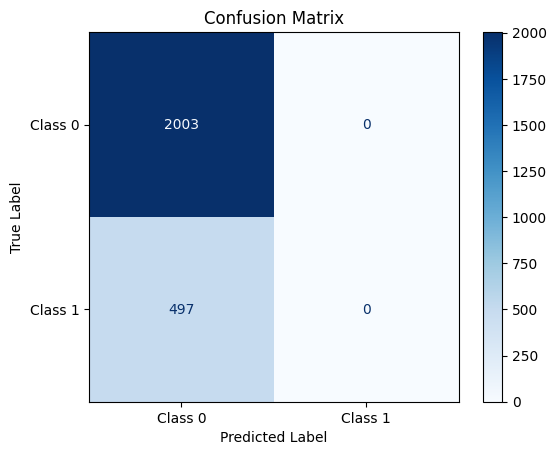

In [18]:


import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcola la matrice di confusione
cm = confusion_matrix(y_test, scaled_preds)

# Mostra la matrice di confusione con ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap="Blues", values_format="d")

# Aggiungi etichette e titolo
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [19]:




from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming we already have y_test and y_preds from our model

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_preds)
print(f"Accuracy: {accuracy:.4f}")

# Calculate and print precision
precision = precision_score(y_test, y_preds)
print(f"Precision: {precision:.4f}")

# Calculate and print recall
recall = recall_score(y_test, y_preds)
print(f"Recall: {recall:.4f}")

# Calculate and print F1 score
f1 = f1_score(y_test, y_preds)
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8012
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))






# ***Accuracy: 0.8012***

Comment: The overall accuracy of the model is 80.12%, indicating that it correctly predicted the churn or non-churn status for this proportion of instances. However, accuracy alone might not be sufficient, especially when dealing with imbalanced datasets.

In summary, while the accuracy is relatively high, the precision and recall scores of 0.0000 indicate a significant issue in predicting instances of churn. Further investigation and model refinement are needed to achieve the study objectives effectively.
